<a href="https://colab.research.google.com/github/Dataniel31/customer-default-prediction/blob/main/customer_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importacion de librerias necesarias


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Carga y Exploración de Datos



# Descomentar la línea siguiente si deseas descargar el archivo desde un enlace


In [5]:
!wget https://raw.githubusercontent.com/Dataniel31/customer-default-prediction/main/credit_card_default.csv

--2024-08-30 23:24:56--  https://raw.githubusercontent.com/Dataniel31/customer-default-prediction/main/credit_card_default.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5026033 (4.8M) [text/plain]
Saving to: ‘credit_card_default.csv.1’

credit_card_default 100%[===================>]   4.79M  19.2MB/s    in 0.3s    

2024-08-30 23:24:57 (19.2 MB/s) - ‘credit_card_default.csv.1’ saved [5026033/5026033]



In [6]:
df = pd.read_csv('credit_card_default.csv')

# Verificar las primeras filas
df.head()



,Unnamed: 0,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,...,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr,default_payment_next_month
0,0,20000,Female,University,Married,24.0,Payment delayed 2 months,Payment delayed 2 months,Payed duly,Payed duly,...,0,0,0,0,689,0,0,0,0,1
1,1,120000,Female,University,Single,26.0,Payed duly,Payment delayed 2 months,Unknown,Unknown,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,90000,Female,University,Single,34.0,Unknown,Unknown,Unknown,Unknown,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,50000,Female,University,Married,37.0,Unknown,Unknown,Unknown,Unknown,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,50000,Male,University,Married,57.0,Payed duly,Unknown,Payed duly,Unknown,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# Información general sobre los datos
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  30000 non-null  int64  
 1   limit_bal                   30000 non-null  int64  
 2   sex                         29850 non-null  object 
 3   education                   29850 non-null  object 
 4   marriage                    29850 non-null  object 
 5   age                         29850 non-null  float64
 6   payment_status_sep          30000 non-null  object 
 7   payment_status_aug          30000 non-null  object 
 8   payment_status_jul          30000 non-null  object 
 9   payment_status_jun          30000 non-null  object 
 10  payment_status_may          30000 non-null  object 
 11  payment_status_apr          30000 non-null  object 
 12  bill_statement_sep          30000 non-null  int64  
 13  bill_statement_aug          300

tratamiento de valores faltantes

In [8]:
# Reemplazar valores faltantes en variables categóricas con la moda
for column in ['sex', 'education', 'marriage']:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Reemplazar valores faltantes en 'age' con la mediana
df['age'].fillna(df['age'].median(), inplace=True)

# Verificar si aún hay valores faltantes
print(df.isnull().sum())

Unnamed: 0                    0
limit_bal                     0
sex                           0
education                     0
marriage                      0
age                           0
payment_status_sep            0
payment_status_aug            0
payment_status_jul            0
payment_status_jun            0
payment_status_may            0
payment_status_apr            0
bill_statement_sep            0
bill_statement_aug            0
bill_statement_jul            0
bill_statement_jun            0
bill_statement_may            0
bill_statement_apr            0
previous_payment_sep          0
previous_payment_aug          0
previous_payment_jul          0
previous_payment_jun          0
previous_payment_may          0
previous_payment_apr          0
default_payment_next_month    0
dtype: int64


codificacion de variables categoricas

In [9]:
df = pd.get_dummies(df, columns=['sex', 'education', 'marriage',
                                 'payment_status_sep', 'payment_status_aug',
                                 'payment_status_jul', 'payment_status_jun',
                                 'payment_status_may', 'payment_status_apr'])

Nomalizacion de los datos

In [10]:
numerical_features = ['limit_bal', 'age', 'bill_statement_sep', 'bill_statement_aug',
                      'bill_statement_jul', 'bill_statement_jun', 'bill_statement_may',
                      'bill_statement_apr', 'previous_payment_sep', 'previous_payment_aug',
                      'previous_payment_jul', 'previous_payment_jun', 'previous_payment_may',
                      'previous_payment_apr']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

seperacion de datos en datos de entrenamiento y pruebas (80/20)

In [11]:
X = df.drop(['Unnamed: 0', 'default_payment_next_month'], axis=1)
y = df['default_payment_next_month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Regresion logistica

In [12]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

random forest

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

gradiend boosting

In [14]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

visualizacion de la distriucion de la variable objetivo

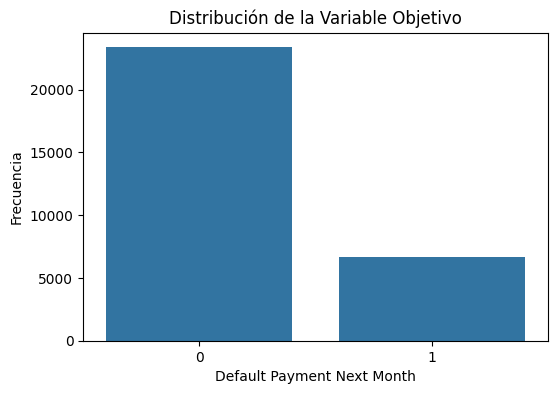

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='default_payment_next_month', data=df)
plt.title('Distribución de la Variable Objetivo')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Frecuencia')
plt.show()

visualizacion de matrices de confusion

In [16]:
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

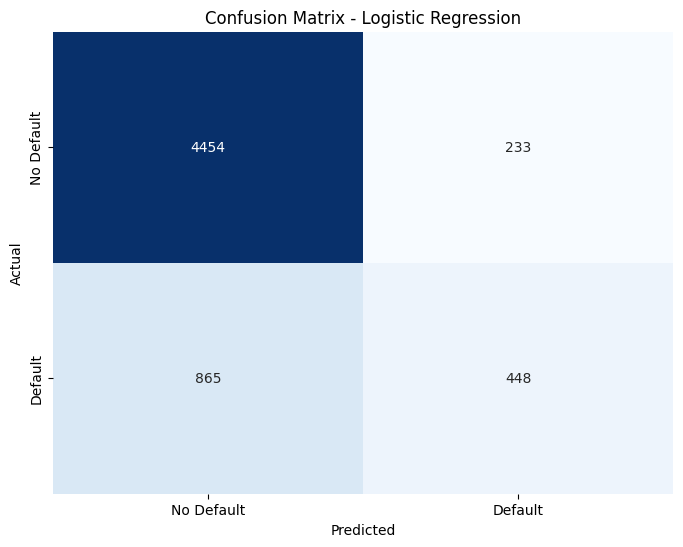

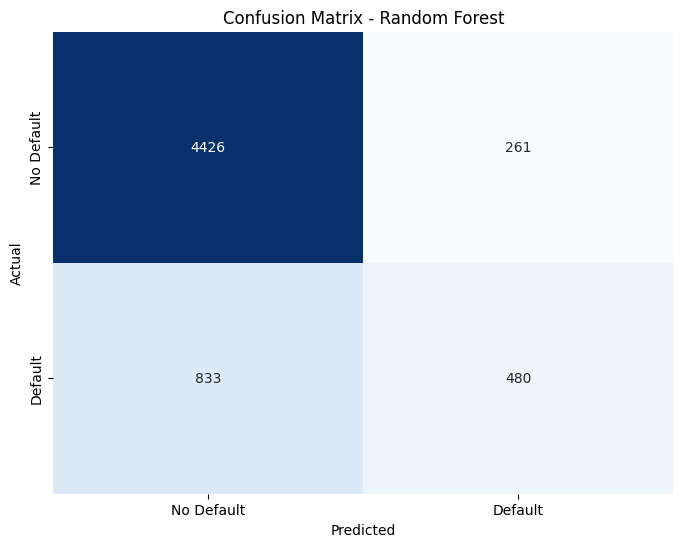

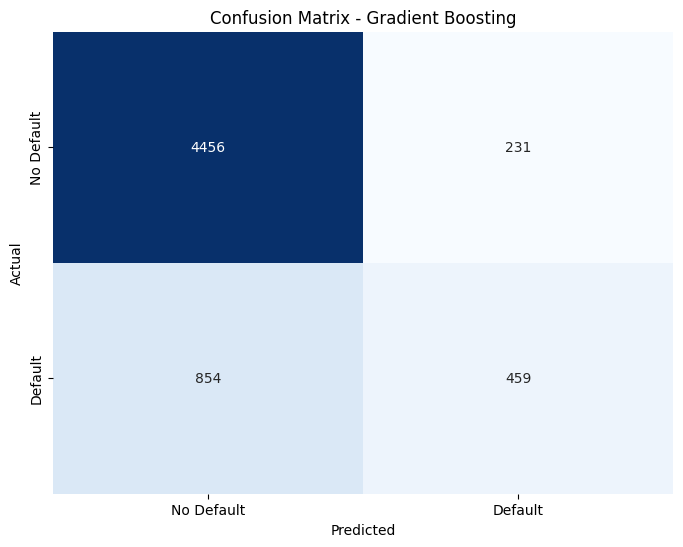

In [17]:
# Matriz de Confusión - Regresión Logística
cm_log = confusion_matrix(y_test, y_pred_log)
plot_confusion_matrix(cm_log, title='Confusion Matrix - Logistic Regression')

# Matriz de Confusión - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, title='Confusion Matrix - Random Forest')

# Matriz de Confusión - Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)
plot_confusion_matrix(cm_gb, title='Confusion Matrix - Gradient Boosting')

comparacion de modelos

<Figure size 1000x600 with 0 Axes>

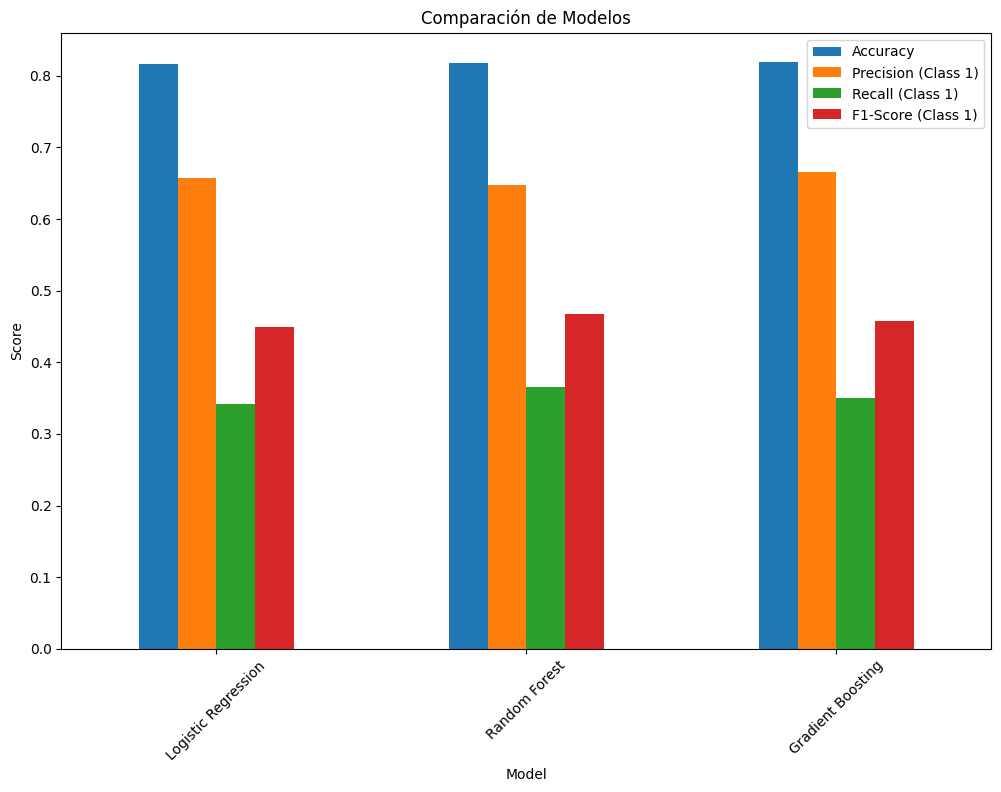

In [18]:
# Extraer métricas
metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [
        classification_report(y_test, y_pred_log, output_dict=True)['accuracy'],
        classification_report(y_test, y_pred_rf, output_dict=True)['accuracy'],
        classification_report(y_test, y_pred_gb, output_dict=True)['accuracy']
    ],
    'Precision (Class 1)': [
        classification_report(y_test, y_pred_log, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_gb, output_dict=True)['1']['precision']
    ],
    'Recall (Class 1)': [
        classification_report(y_test, y_pred_log, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_gb, output_dict=True)['1']['recall']
    ],
    'F1-Score (Class 1)': [
        classification_report(y_test, y_pred_log, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_gb, output_dict=True)['1']['f1-score']
    ]
}

metrics_df = pd.DataFrame(metrics)

plt.figure(figsize=(10, 6))
metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Comparación de Modelos')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

distribucion de caracteristicas

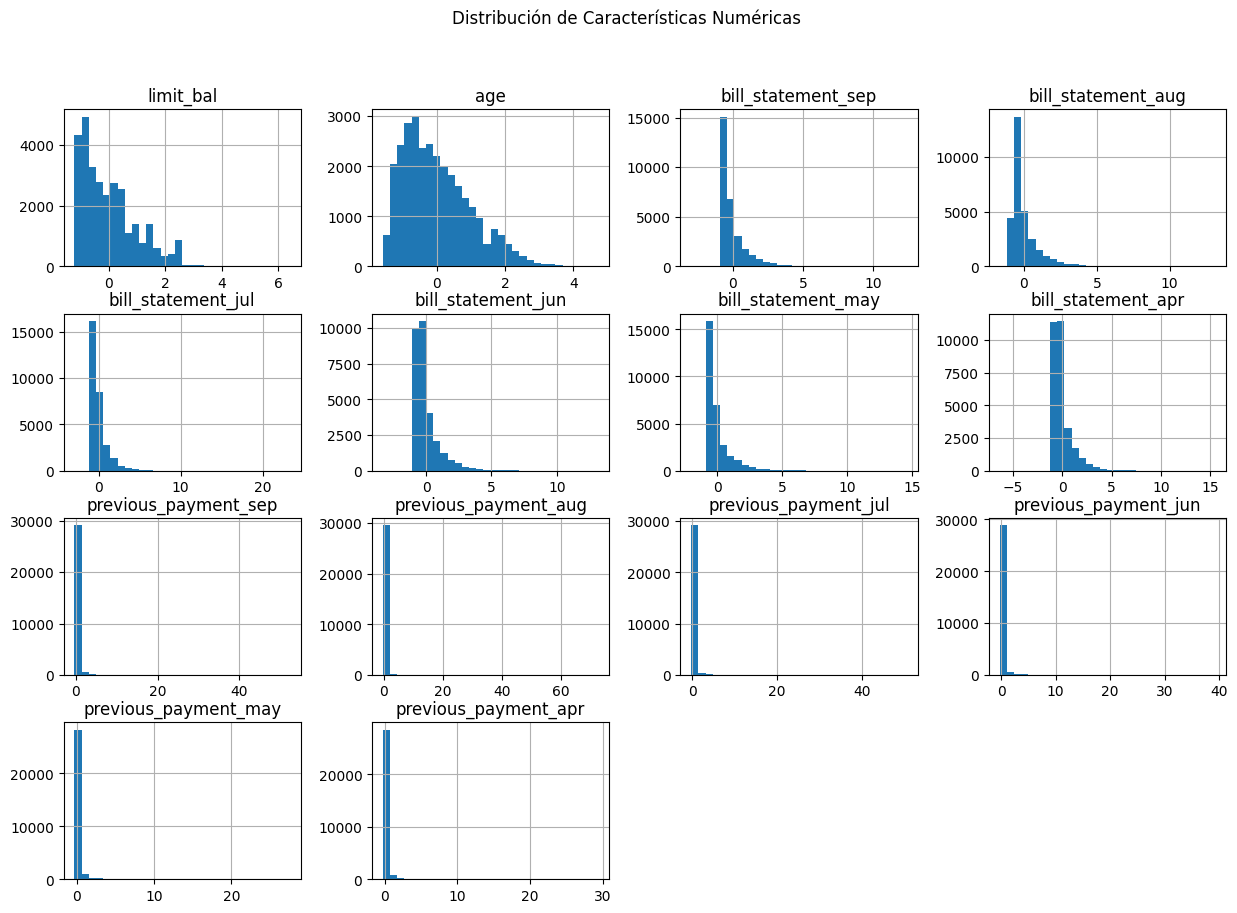

In [19]:
# Histogramas para características numéricas
df[numerical_features].hist(figsize=(15, 10), bins=30)
plt.suptitle('Distribución de Características Numéricas')
plt.show()

## Conclusión del Modelo

Después de entrenar y evaluar los modelos de Regresión Logística, Random Forest y Gradient Boosting, se observa que el modelo de **Gradient Boosting** ofrece el mejor balance entre precisión y recall para la clase positiva (incumplimiento). Aunque todos los modelos tienen una accuracy similar, el Gradient Boosting destaca por su mayor recall y F1-score para la clase positiva, lo cual es crucial para la detección de incumplimientos. Por lo tanto, el **modelo de Gradient Boosting** se selecciona como el modelo óptimo para predecir el incumplimiento de pago en el próximo mes.
